哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_taipei = pd.read_csv('A_lvr_land_A.csv')
df_taichung = pd.read_csv('B_lvr_land_A.csv')
df_kaohsiung = pd.read_csv('E_lvr_land_A.csv')
df_new_taipei = pd.read_csv('F_lvr_land_A.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
display(df_taipei.head(2))
display(round(df_taipei.isna().sum(axis = 0) / len(df_taipei), 2))

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN


鄉鎮市區             0.00
交易標的             0.00
土地區段位置建物區段門牌     0.00
土地移轉總面積平方公尺      0.00
都市土地使用分區         0.01
非都市土地使用分區        1.00
非都市土地使用編定        1.00
交易年月日            0.00
交易筆棟數            0.00
移轉層次             0.12
總樓層數             0.12
建物型態             0.00
主要用途             0.14
主要建材             0.12
建築完成年月           0.17
建物移轉總面積平方公尺      0.00
建物現況格局-房         0.00
建物現況格局-廳         0.00
建物現況格局-衛         0.00
建物現況格局-隔間        0.00
有無管理組織           0.00
總價元              0.00
單價元平方公尺          0.05
車位類別             0.67
車位移轉總面積(平方公尺)    0.00
車位總價元            0.00
備註               0.42
編號               0.00
主建物面積            0.00
附屬建物面積           0.00
陽台面積             0.00
電梯               0.41
dtype: float64

In [5]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
cities = {'Taipei': df_taipei, 'Taichung': df_taichung, 'Kaohsiung': df_kaohsiung, 'New_Taipei': df_new_taipei}
for i in cities:
    cities[i].drop(index = 0, inplace = True)
    display(cities[i].head(1))

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,五層,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.8,18.34,0.0,NaN


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,一層，二層，騎樓,...,137122,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.0,NaN


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.1,NaN


In [6]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
for city in cities:
    cities[city]['city'] = city
    display(cities[city].city.head(1))

1    Taipei
Name: city, dtype: object

1    Taichung
Name: city, dtype: object

1    Kaohsiung
Name: city, dtype: object

1    New_Taipei
Name: city, dtype: object

In [7]:
#4. 將以上四份資料運用pd.concat()串接
df_all = pd.DataFrame()
for city in cities:
    df_all = pd.concat([df_all, cities[city]], axis = 0)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59476 entries, 1 to 19818
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [8]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [9]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df_all.rename(columns = columns_mapping, inplace = True)
#df_all.head(5)

In [10]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_interested = df_all[(df_all['main_use'] == '住家用') & (df_all['use_zoning'] == '住')]
df_interested[['main_use', 'use_zoning']].head(5)
df_interested.dropna(subset = analysis_columns, inplace = True)
df_interested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7802 non-null   object 
 1   transaction_sign            7802 non-null   object 
 2   house_number                7802 non-null   object 
 3   land_area_square_meter      7802 non-null   object 
 4   use_zoning                  7802 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7802 non-null   object 
 8   transaction_pen_number      7802 non-null   object 
 9   shifting_level              7802 non-null   object 
 10  total_floor_number          7796 non-null   object 
 11  building_state              7802 non-null   object 
 12  main_use                    7802 non-null   object 
 13  main_materials              7801

In [11]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_interested = df_interested.astype(columns_type)
df_interested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7802 non-null   object 
 1   transaction_sign            7802 non-null   object 
 2   house_number                7802 non-null   object 
 3   land_area_square_meter      7802 non-null   object 
 4   use_zoning                  7802 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7802 non-null   object 
 8   transaction_pen_number      7802 non-null   object 
 9   shifting_level              7802 non-null   object 
 10  total_floor_number          7796 non-null   object 
 11  building_state              7802 non-null   object 
 12  main_use                    7802 non-null   object 
 13  main_materials              7801

In [12]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df_interested['tx_dt_year'] = df_interested['tx_dt'].apply(lambda x: x[:3])
#df_interested['tx_dt_year'].head(5)
df_narrowed = df_interested[(df_interested['tx_dt_year'] == '109') & (df_interested['room_number'] >= 1) & (df_interested['hall_number'] <= 2) & (df_interested['room_number'] <= 5) & (df_interested['hall_number'] >= 1)]
df_narrowed.reset_index(inplace = True, drop = True)
df_narrowed.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city,tx_dt_year
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [13]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_narrowed['building_area_square_feet'] = df_narrowed['building_area_square_meter'] * 0.3025
df_narrowed['main_building_area_square_feet'] = df_narrowed['main_building_area'] * 0.3025
df_narrowed['unit_price_square_feet'] = df_narrowed['unit_price'] / 0.3025

<ipython-input-13-325bae7014d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrowed['building_area_square_feet'] = df_narrowed['building_area_square_meter'] * 0.3025
<ipython-input-13-325bae7014d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrowed['main_building_area_square_feet'] = df_narrowed['main_building_area'] * 0.3025
<ipython-input-13-325bae7014d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [14]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_narrowed.describe()

,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03
mean,121.712089,2.850885,1.793299,1.733536,1.138712e+07,94364.671163,82.086667,4.879959,5.089267,36.817907,24.831217,3.119493e+05
std,62.871712,0.898498,0.404969,0.681085,1.159445e+07,58317.311227,37.363166,7.779029,6.066916,19.018693,11.302358,1.927845e+05
min,0.970000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,82.965000,2.000000,2.000000,1.000000,5.580000e+06,53532.250000,60.682500,0.000000,0.000000,25.096912,18.356456,1.769661e+05
50%,109.390000,3.000000,2.000000,2.000000,8.550000e+06,79610.000000,78.990000,1.110000,2.860000,33.090475,23.894475,2.631736e+05
75%,147.517500,3.000000,2.000000,2.000000,1.329500e+07,118728.250000,95.797500,8.300000,9.450000,44.624044,28.978744,3.924901e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06


remove the data whose total_price = 0 and main_building_area = 0

In [22]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df_narrowed.drop(df_narrowed[df_narrowed['total_price'] == 0].index, inplace = True)
df_narrowed.drop(df_narrowed[df_narrowed['main_building_area'] == 0].index, inplace = True)
df_narrowed.describe()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,121.768404,2.849869,1.793114,1.733149,1.141669e+07,94548.453020,82.565725,4.908439,5.118968,36.834942,24.976132,3.125569e+05
std,62.849105,0.898343,0.405103,0.680869,1.161669e+07,58374.690321,36.940424,7.792733,6.072088,19.011854,11.174478,1.929742e+05
min,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,7.440000,0.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,83.012500,2.000000,2.000000,1.000000,5.600000e+06,53597.250000,61.062500,0.000000,0.000000,25.111281,18.471406,1.771810e+05
50%,109.405000,3.000000,2.000000,2.000000,8.600000e+06,79742.500000,79.110000,1.180000,3.010000,33.095012,23.930775,2.636116e+05
75%,147.445000,3.000000,2.000000,2.000000,1.330000e+07,118880.000000,95.970000,8.357500,9.487500,44.602112,29.030925,3.929917e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [16]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
from scipy import stats

df_narrowed_tpe = df_narrowed[df_narrowed['city'] == 'Taipei']
#df_narrowed_tpe.info()
df_narrowed_tpe = df_narrowed_tpe.select_dtypes(exclude = ['object'])
df_narrowed_tpe.info()

for i in df_narrowed_tpe:
    corr, _ = stats.pearsonr(df_narrowed_tpe['total_price'], df_narrowed_tpe[i])
    if abs(corr) >= 0.7:
        print(f'{i}, {round(corr,2)}, strong')
    elif abs(corr) >= 0.3:
        print(f'{i}, {round(corr,2)}, intermediate')
    else:
        print(f'{i}, {round(corr,2)}, weak')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   building_area_square_meter      1378 non-null   float64
 1   room_number                     1378 non-null   int32  
 2   hall_number                     1378 non-null   int32  
 3   health_number                   1378 non-null   int32  
 4   total_price                     1378 non-null   int32  
 5   unit_price                      1378 non-null   float64
 6   main_building_area              1378 non-null   float64
 7   auxiliary_building_area         1378 non-null   float64
 8   balcony_area                    1378 non-null   float64
 9   building_area_square_feet       1378 non-null   float64
 10  main_building_area_square_feet  1378 non-null   float64
 11  unit_price_square_feet          1378 non-null   float64
dtypes: float64(8), int32(4)
memory usa

In [17]:
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
for i in df_narrowed_tpe:
    corr, _ = stats.pearsonr(df_narrowed_tpe['unit_price_square_feet'], df_narrowed_tpe[i])
    if abs(corr) >= 0.7:
        print(f'{i}, {round(corr,2)}, strong')
    elif abs(corr) >= 0.5:
        print(f'{i}, {round(corr,2)}, intermediate')
    else:
        print(f'{i}, {round(corr,2)}, weak')

building_area_square_meter, 0.22, weak
room_number, -0.1, weak
hall_number, 0.0, weak
health_number, 0.13, weak
total_price, 0.58, intermediate
unit_price, 1.0, strong
main_building_area, 0.12, weak
auxiliary_building_area, 0.08, weak
balcony_area, 0.02, weak
building_area_square_feet, 0.22, weak
main_building_area_square_feet, 0.12, weak
unit_price_square_feet, 1.0, strong


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

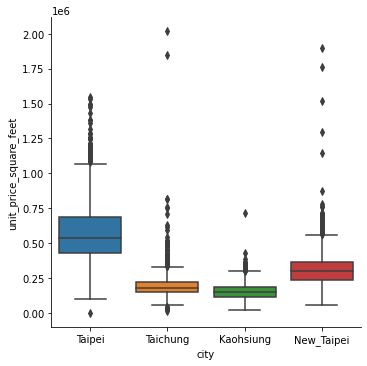

In [18]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import seaborn as sns
sns.catplot(x = 'city', y = 'unit_price_square_feet', data = df_narrowed, kind = 'box')

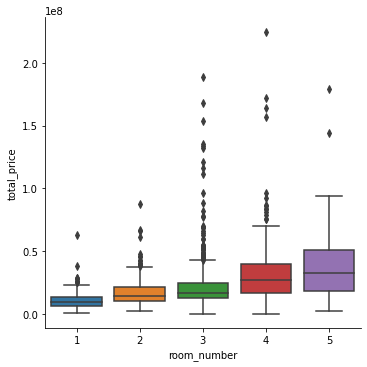

In [19]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
sns.catplot(x = 'room_number', y = 'total_price', data = df_narrowed[df_narrowed['city'] == 'Taipei'], kind = 'box')

<ipython-input-20-61a08b242e4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrowed_tpe['towns'] = le.fit_transform(df_narrowed_tpe['towns'])


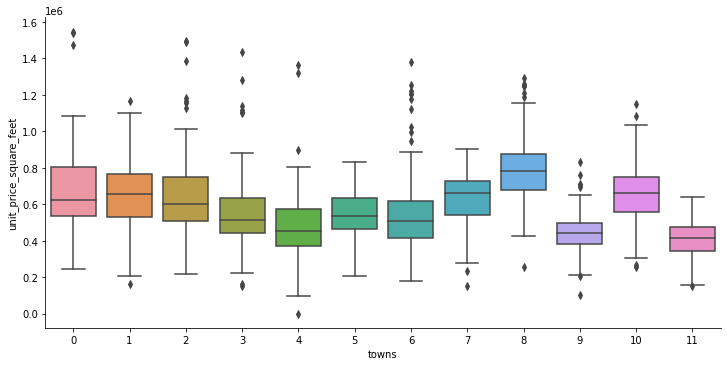

In [20]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
df_narrowed_tpe = df_narrowed[df_narrowed['city'] == 'Taipei']
le = LabelEncoder()
df_narrowed_tpe['towns'] = le.fit_transform(df_narrowed_tpe['towns'])
sns.catplot(x = 'towns', y = 'unit_price_square_feet', data = df_narrowed_tpe, kind = 'box', aspect = 2)

In [21]:
le.inverse_transform([8])

array(['大安區'], dtype=object)